In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.prompt').hide();
 } else {
 $('div.input').show();
 $('div.prompt').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# ChemMatCARS User Statistics Calculations

In [4]:
%matplotlib notebook
import pandas as pd
import pylab as pl
user_inst=pd.read_excel('./institution_data.xlsx')
country_state=user_inst.set_index('Institution').to_dict()

FileNotFoundError: [Errno 2] No such file or directory: './institution_data.xlsx'

## Data from Dec 2018

In [5]:
data=pd.read_excel('./Data/ChemMatCARS_test.xlsx')
data_raw=data.dropna(axis=1,how='all')
data_raw.shape

(2000, 17)

### Funding Sources

In [4]:
data_raw.drop_duplicates(('Badge No','Funding Source','Institution'))['Funding Source'].value_counts()

NSF                                              150
DOE - Office of Basic Energy Science              96
Foreign                                           82
Other - Specify                                   71
NIH                                               22
Industry                                          15
DOE - other (incl. LDRD)                          14
DOD (incl.Air Force, Army, etc.)                  10
Other U.S. Government (incl. NIST, EPA, etc.)      6
Howard Hughes Medical Institute (HHMI)             3
Name: Funding Source, dtype: int64

In [ ]:
### World Map

In [9]:
def update_dict(institute):
    x=input('Please provide the country for %s\n'%institute)
    country_state['Country'][institute]=x
    if x=='USA':
        y=input('Please provide the state for %s\n'%institute)
        country_state['state'][institute]=y
    return x

world1=data_raw.drop_duplicates(('Badge No','Institution'))[['Institution']]
#world1['Country']=world1['Institution']
#world1['State']=world1['Institution']
#world1.loc[world1.Institution in country_state['Country'], 'Country']=country_state['Country'][Institution]
world1['Country']=world1['Institution'].apply(lambda x: country_state['Country'][x] if x in country_state['Country'] else update_dict(x))


### Unique Users

<IPython.core.display.Javascript object>


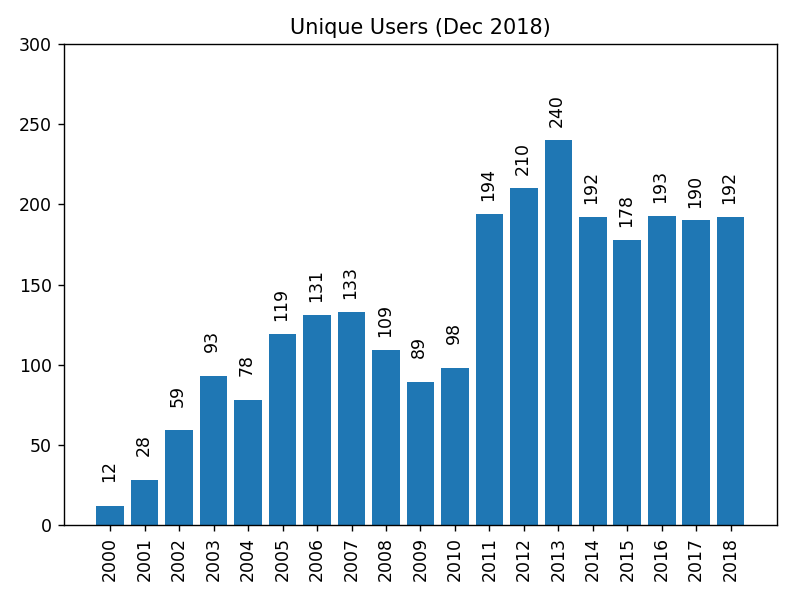

In [5]:
data_raw_sort=data_raw.sort_values('Posted Date')
data_raw_sort=data_raw_sort.set_index(['Posted Date'])
dates=pd.date_range('2000-1-1',periods=20,freq='AS')
unique_users=[]
for i,date in enumerate(dates[:-1]):
    unique_users.append([2000+i,data_raw_sort.loc[date:dates[i+1]].drop_duplicates('Badge No').count()['Badge No']])
unique_users=pl.array(unique_users)
pl.figure()
pl.bar(unique_users[:,0],unique_users[:,1])
for x,y in unique_users:
    pl.text(x-0.3,y+20,str(y),rotation='vertical')
pl.xticks(pl.arange(2000,2019),rotation='vertical')
pl.title('Unique Users (Dec 2018)')
pl.ylim(0,300)
pl.tight_layout()
#data_raw_sort.loc[dates[0]:dates[1]].drop_duplicates('Badge No').sort_values('Badge No')

## Data from Jan 2018

In [6]:
data2=pd.read_excel('./15_users_20180105.xlsx',skiprows=0)
data2_raw=data2.dropna(axis=1,how='all')

### Funding Sources

In [7]:
data2_raw.drop_duplicates(('Badge No','Funding Source','Institution'))['Funding Source'].value_counts()

NSF                                                                             654
DOE - Office of Basic Energy Science                                            518
Other - Specify                                                                 385
Foreign                                                                         217
NIH                                                                             133
DOE - other (incl. LDRD)                                                        130
DOD (incl.Air Force, Army, etc.)                                                 97
Industry                                                                         91
University/Educational Institution                                               77
Other U.S. Government (incl. NIST, EPA, etc.)                                    73
NNSA                                                                             16
NASA                                                                        

### Unique Users

<IPython.core.display.Javascript object>


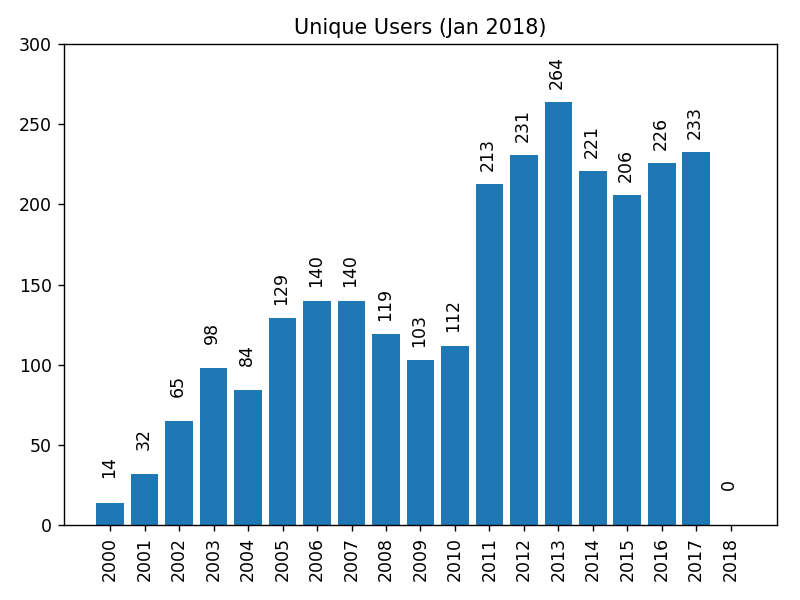

In [8]:
data2_raw['Posted Date']=pd.to_datetime(data2_raw['Posted Date'])
data2_raw_sort=data2_raw.sort_values('Posted Date')
data2_raw_sort=data2_raw_sort.set_index(['Posted Date'])
dates=pd.date_range('2000-1-1',periods=20,freq='AS')
unique_users=[]
for i,date in enumerate(dates[:-1]):
    unique_users.append([2000+i,data2_raw_sort.loc[date:dates[i+1]].drop_duplicates('Badge No').count()['Badge No']])
unique_users=pl.array(unique_users)
pl.figure()
pl.bar(unique_users[:,0],unique_users[:,1])
for x,y in unique_users:
    pl.text(x-0.3,y+20,str(y),rotation='vertical')
pl.xticks(pl.arange(2000,2019),rotation='vertical')
pl.title('Unique Users (Jan 2018)')
pl.ylim(0,300)
pl.tight_layout()
#data2_raw_sort.loc[dates[0]:dates[1]].drop_duplicates('Badge No').sort_values('Badge No')

## Data from Feb 2017

In [16]:
data3=pd.read_csv('./ChemMatCARS_20170217.csv',skiprows=0)
data3_raw=data3.dropna(axis=1,how='all')

### Funding Sources

In [17]:
data3_raw.drop_duplicates(('Badge No','Funding Source','Institution'))['Funding Source'].value_counts()

NSF                                                      599
DOE - Office of Basic Energy Science                     461
Other - Specify                                          368
Foreign                                                  200
DOE - other (incl. LDRD)                                 127
NIH                                                      123
Industry                                                  77
DOD (incl.Air Force, Army, etc.)                          68
Other U.S. Government (incl. NIST, EPA, etc.)             67
University/Educational Institution                        42
NNSA                                                      10
NASA                                                      10
Howard Hughes Medical Institute (HHMI)                     6
Homeland Security                                          5
DOE - Office of Biological and Environmental Research      4
Name: Funding Source, dtype: int64

### Unique Users

<IPython.core.display.Javascript object>


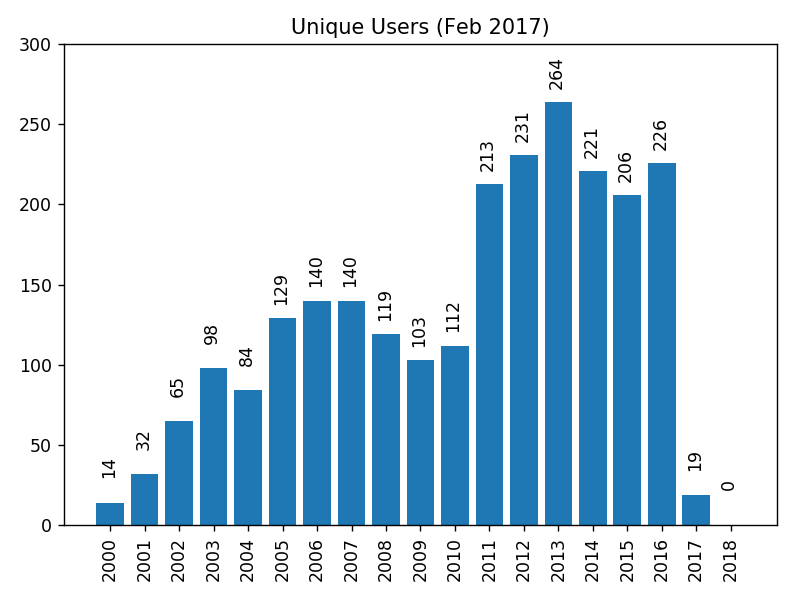

In [18]:
data3_raw['Posted Date']=pd.to_datetime(data3_raw['Posted Date'])
data3_raw_sort=data3_raw.sort_values('Posted Date')
data3_raw_sort=data3_raw_sort.set_index(['Posted Date'])
dates=pd.date_range('2000-1-1',periods=20,freq='AS')
unique_users=[]
for i,date in enumerate(dates[:-1]):
    unique_users.append([2000+i,data3_raw_sort.loc[date:dates[i+1]].drop_duplicates('Badge No').count()['Badge No']])
unique_users=pl.array(unique_users)
pl.figure()
pl.bar(unique_users[:,0],unique_users[:,1])
for x,y in unique_users:
    pl.text(x-0.3,y+20,str(y),rotation='vertical')
pl.xticks(pl.arange(2000,2019),rotation='vertical')
pl.title('Unique Users (Feb 2017)')
pl.ylim(0,300)
pl.tight_layout()
#data3_raw_sort.loc[dates[0]:dates[1]].drop_duplicates('Badge No').sort_values('Badge No')

## Data from Feb 2016

In [9]:
data3=pd.read_excel('./ChemMatCARS_20160225.xlsx',skiprows=0)
data3_raw=data3.dropna(axis=1,how='all')

### Funding Sources

In [10]:
data3_raw.drop_duplicates(('Badge No','Funding Source','Institution'))['Funding Source'].value_counts()

NSF                                                      567
DOE - Office of Basic Energy Science                     431
Other - Specify                                          355
Foreign                                                  192
DOE - other (incl. LDRD)                                 128
NIH                                                      113
Industry                                                  79
Other U.S. Government (incl. NIST, EPA, etc.)             67
DOD (incl.Air Force, Army, etc.)                          63
University/Educational Institution                        18
Howard Hughes Medical Institute (HHMI)                     7
NNSA                                                       6
NASA                                                       6
Homeland Security                                          5
DOE - Office of Biological and Environmental Research      4
Name: Funding Source, dtype: int64

### Unique Users

<IPython.core.display.Javascript object>


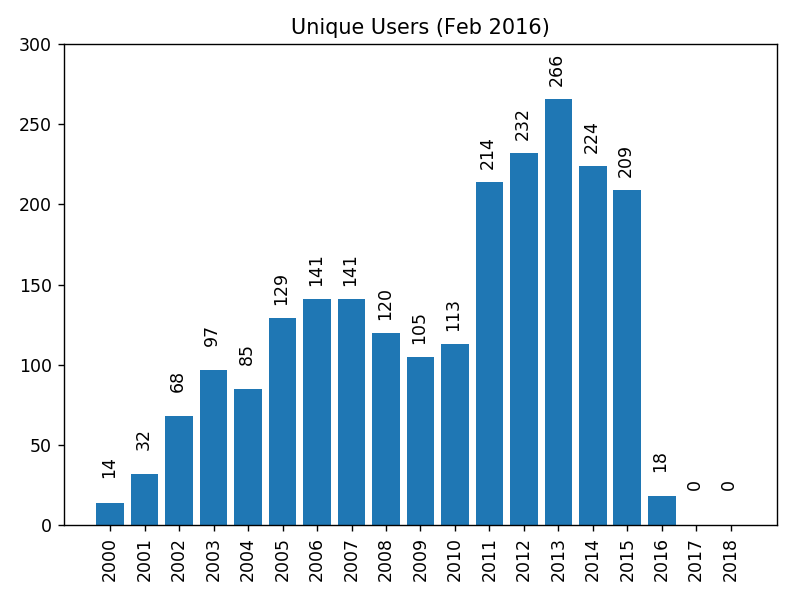

In [11]:
data3_raw['Posted Date']=pd.to_datetime(data3_raw['Posted Date'])
data3_raw_sort=data3_raw.sort_values('Posted Date')
data3_raw_sort=data3_raw_sort.set_index(['Posted Date'])
dates=pd.date_range('2000-1-1',periods=20,freq='AS')
unique_users=[]
for i,date in enumerate(dates[:-1]):
    unique_users.append([2000+i,data3_raw_sort.loc[date:dates[i+1]].drop_duplicates('Badge No').count()['Badge No']])
unique_users=pl.array(unique_users)
pl.figure()
pl.bar(unique_users[:,0],unique_users[:,1])
for x,y in unique_users:
    pl.text(x-0.3,y+20,str(y),rotation='vertical')
pl.xticks(pl.arange(2000,2019),rotation='vertical')
pl.title('Unique Users (Feb 2016)')
pl.ylim(0,300)
pl.tight_layout()
#data3_raw_sort.loc[dates[0]:dates[1]].drop_duplicates('Badge No').sort_values('Badge No')

## Data from Jan 2015

In [14]:
data4=pd.read_excel('./ChemMatCARS_20150817_g.xlsx',skiprows=0)
data4_raw=data4.dropna(axis=1,how='all')

### Funding Sources

In [13]:
data4_raw.drop_duplicates(('Badge No','Funding Source','Institution'))['Funding Source'].value_counts()

NSF                                                      542
DOE - Office of Basic Energy Science                     408
Other - Specify                                          341
Foreign                                                  185
DOE - other (incl. LDRD)                                 124
NIH                                                      108
Industry                                                  66
Other U.S. Government (incl. NIST, EPA, etc.)             63
DOD (incl.Air Force, Army, etc.)                          52
NNSA                                                       6
Howard Hughes Medical Institute (HHMI)                     6
Homeland Security                                          5
DOE - Office of Biological and Environmental Research      4
Name: Funding Source, dtype: int64

### Unique Users

<IPython.core.display.Javascript object>


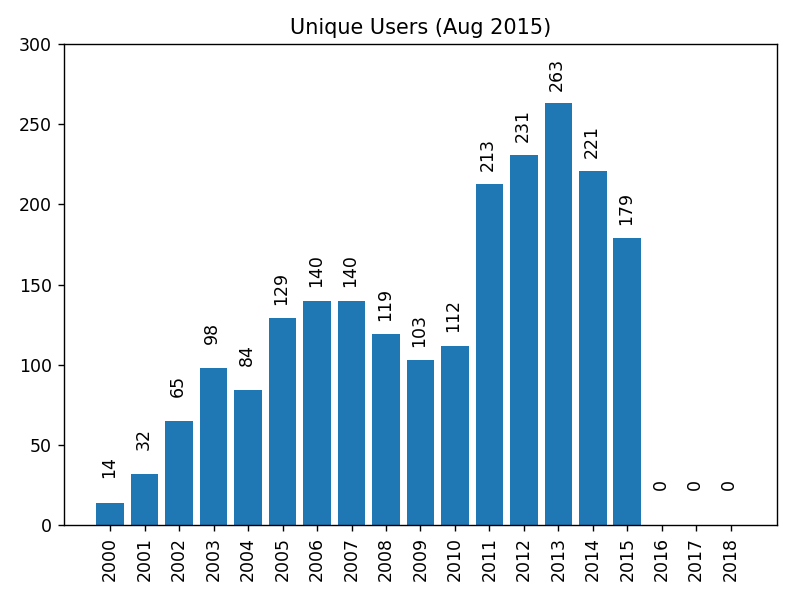

In [14]:
data4_raw['Posted Date']=pd.to_datetime(data4_raw['Posted Date'])
data4_raw_sort=data4_raw.sort_values('Posted Date')
data4_raw_sort=data4_raw_sort.set_index(['Posted Date'])
dates=pd.date_range('2000-1-1',periods=20,freq='AS')
unique_users=[]
for i,date in enumerate(dates[:-1]):
    unique_users.append([2000+i,data4_raw_sort.loc[date:dates[i+1]].drop_duplicates(('Badge No')).count()['Badge No']])
unique_users=pl.array(unique_users)
pl.figure()
pl.bar(unique_users[:,0],unique_users[:,1])
for x,y in unique_users:
    pl.text(x-0.3,y+20,str(y),rotation='vertical')
pl.xticks(pl.arange(2000,2019),rotation='vertical')
pl.title('Unique Users (Aug 2015)')
pl.ylim(0,300)
pl.tight_layout()
#data4_raw_sort.loc[dates[0]:dates[1]].drop_duplicates('Badge No').sort_values('Badge No')

## Data from Jan 2014

In [15]:
data5=pd.read_csv('./ChemMatCARS_20140115.csv',skiprows=0)
data5_raw=data5.dropna(axis=1,how='all')

### Funding Sources

In [16]:
data5_raw.drop_duplicates(('Badge No','Funding Source','Institution'))['Funding Source'].value_counts()

NSF                                                     433
DOE, Office of Basic Energy Science                     348
Other (Specify)                                         288
Foreign (specify)                                       170
DOE, Other (specify)                                    114
NIH                                                      93
Industry                                                 61
Other U.S. Government                                    58
DOD, (specify)                                           38
NNSA                                                      6
Howard Hughes Medical Institute (HHMI)                    6
Homeland Security                                         5
DOE, Office of Biological and Environmental Research      4
Name: Funding Source, dtype: int64

### Funding Sources

<IPython.core.display.Javascript object>


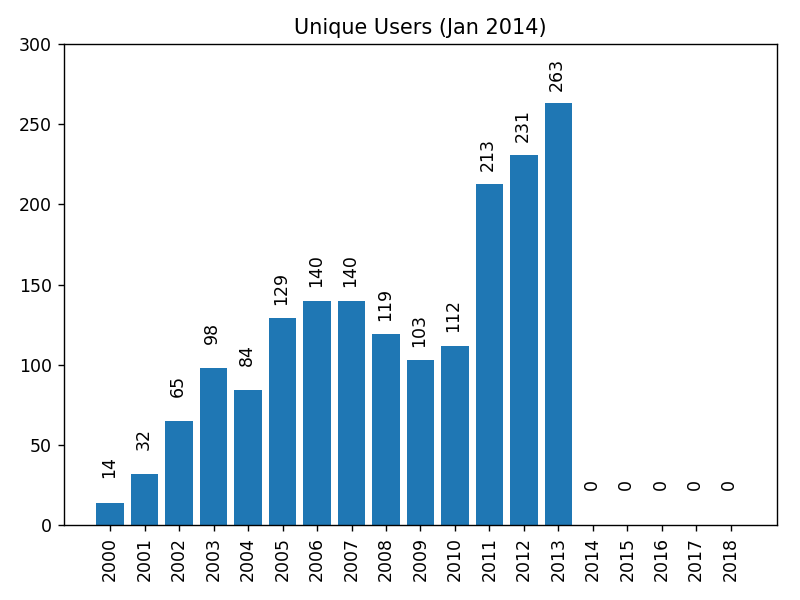

In [17]:
data5_raw['Posted Date']=pd.to_datetime(data5_raw['Posted Date'])
data5_raw_sort=data5_raw.sort_values('Posted Date')
data5_raw_sort=data5_raw_sort.set_index(['Posted Date'])
dates=pd.date_range('2000-1-1',periods=20,freq='AS')
unique_users=[]
for i,date in enumerate(dates[:-1]):
    unique_users.append([2000+i,data5_raw_sort.loc[date:dates[i+1]].drop_duplicates(('Badge No')).count()['Badge No']])
unique_users=pl.array(unique_users)
pl.figure()
pl.bar(unique_users[:,0],unique_users[:,1])
for x,y in unique_users:
    pl.text(x-0.3,y+20,str(y),rotation='vertical')
pl.xticks(pl.arange(2000,2019),rotation='vertical')
pl.title('Unique Users (Jan 2014)')
pl.ylim(0,300)
pl.tight_layout()
#data4_raw_sort.loc[dates[0]:dates[1]].drop_duplicates('Badge No').sort_values('Badge No')

## Reading and updating the country-state file

In [30]:
country_state_full=pd.read_excel('./country_state.xlsx','org')
country_state=country_state.drop_duplicates('Institution')[['Institution','Country','state']].sort_values('Institution')
country_state.to_excel('./institution_data.xlsx',index=False)